### Steps
    Import dataset
    Plot dataset
    Exploring Dataset using EDA
    Check if data is stationary or not(using ADF test)
    (If not stationary perform various transpormations like .diff(), lof, square root, proportional change etc. )
    After making stationary, Try finding d, p, q using ACF and PACF plot
    Apply ARIMA model and do predictions/forecasting
    Evaluate the Time series model



### About Dataset: 
The Monthly production of Candy from 1972 to 2017 has been strored

### Importing Dataset and libraries

In [1]:
# Import modules
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

### Reading and plotting the dataset

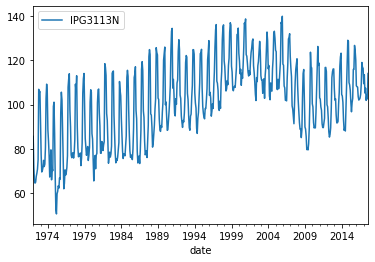

In [2]:
# Load in the time series
candy = pd.read_csv('candy_production.csv', index_col='date', parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
candy.plot(ax=ax)#plotting the series
plt.show()

### EDA

In [3]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 1972-01-01 to 2017-08-01
Data columns (total 1 columns):
IPG3113N    548 non-null float64
dtypes: float64(1)
memory usage: 8.6 KB


In [4]:
candy.shape

(548, 1)

In [5]:
candy.columns

Index(['IPG3113N'], dtype='object')

In [6]:
#checking null
candy.isnull().sum()#No null exists

IPG3113N    0
dtype: int64

In [7]:
#understanding data set in terms if its quantiles
candy.describe()

,IPG3113N
count,548.000000
mean,100.662524
std,18.052931
min,50.668900
25%,87.862475
50%,102.278550
75%,114.691900
max,139.915300


### Lets check stationarity using ADF test(Dickey Fuller test)

In [8]:
#Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller


In [9]:
# Run test
result = adfuller(candy["IPG3113N"])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-1.8870498112252803
0.33817759730042934
{'1%': -3.442678467240966, '5%': -2.8669778698997543, '10%': -2.5696661916864083}


##### Result: Ho is non-stationary. p-value<0.05, So Ho rejected. It is stationary time series. The d=0 in (p,d,q)

### Plot ACF and PACF

In [10]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

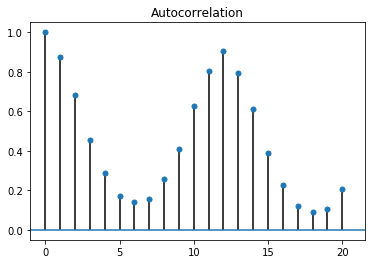

In [11]:
plot_acf(candy, alpha=1, lags=20)
plt.show()

##### Result: The ACF plot trails of gradually Showing AR properties

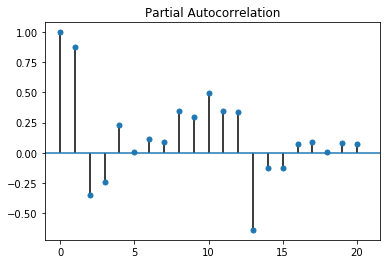

In [12]:
plot_pacf(candy, alpha=1, lags=20)
plt.show()

##### Result: The PACF plot also trails of gradually Showing MA properties

###### Lets find the value the p, d, r of ARMA model. We can assume d=0 as the dataset is already stationarity.

### Find p, q, d using AIC and BIC 

In [13]:
'''##### finding p

# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
AIC = np.zeros(7)
for p in range(7):
    mod = ARMA(candy, order=(p,0))
    res = mod.fit()
# Save AIC for AR(p)    
    AIC[p] = res.aic#using AIC as it a predictive model
    
# Plot the BIC as a function of p
plt.plot(range(1,7), AIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Akaike Information Criterion')
plt.show()'''

"##### finding p\n\n# Import the module for estimating an ARMA model\nfrom statsmodels.tsa.arima_model import ARMA\n\n# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC\nAIC = np.zeros(7)\nfor p in range(7):\n    mod = ARMA(candy, order=(p,0))\n    res = mod.fit()\n# Save AIC for AR(p)    \n    AIC[p] = res.aic#using AIC as it a predictive model\n    \n# Plot the BIC as a function of p\nplt.plot(range(1,7), AIC[1:7], marker='o')\nplt.xlabel('Order of AR Model')\nplt.ylabel('Akaike Information Criterion')\nplt.show()"

In [14]:
# Create empty list to store search results
order_aic_bic=[]#empty list to  store order and AIC, BIC values

# Loop over p values from 0-2
for p in range(0,3):
  # Loop over q values from 0-2
    for q in range(0,3):
      	# create and fit ARMA(p,q) model
        model = ARMA(candy, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic,results.bic))

C:\Users\kishan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kishan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kishan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kishan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kishan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Us

In [15]:
order_aic_bic

[(0, 0, 4729.221363240688, 4737.833913814585),
 (0, 1, 4729.221363240688, 4737.833913814585),
 (0, 2, 4729.221363240688, 4737.833913814585),
 (1, 0, 3937.61830726144, 3950.537133122284),
 (1, 1, 3937.61830726144, 3950.537133122284),
 (1, 2, 3937.61830726144, 3950.537133122284),
 (2, 0, 3870.6662022174087, 3887.8913033652007),
 (2, 1, 3870.6662022174087, 3887.8913033652007),
 (2, 2, 3870.6662022174087, 3887.8913033652007)]

In [16]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q          AIC          BIC
6  2  0  3870.666202  3887.891303
7  2  1  3870.666202  3887.891303
8  2  2  3870.666202  3887.891303
3  1  0  3937.618307  3950.537133
4  1  1  3937.618307  3950.537133
5  1  2  3937.618307  3950.537133
0  0  0  4729.221363  4737.833914
1  0  1  4729.221363  4737.833914
2  0  2  4729.221363  4737.833914
   p  q          AIC          BIC
6  2  0  3870.666202  3887.891303
7  2  1  3870.666202  3887.891303
8  2  2  3870.666202  3887.891303
3  1  0  3937.618307  3950.537133
4  1  1  3937.618307  3950.537133
5  1  2  3937.618307  3950.537133
0  0  0  4729.221363  4737.833914
1  0  1  4729.221363  4737.833914
2  0  2  4729.221363  4737.833914


##### Results:
    The order (2,0,1) gives the lowest pair of AIC and BIC

### Splitting and Creating train and test dataset

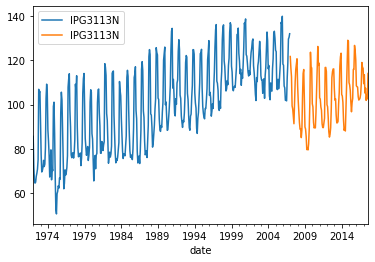

In [17]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

### Apply ARIMA model and do predictions/forecasting

In [18]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

C:\Users\kishan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


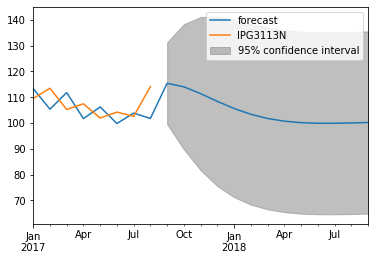

In [19]:
# Forecast the first AR(1) model
mod = ARMA(candy, order=(2,1))
res = mod.fit()#storing the results of ARMA model
res.plot_predict(start=540, end=560)#prediction start and end indices from the time series time column
plt.show()

### Evaluate the Time series model

In [20]:
# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(res.resid))

# Print mean absolute error
print(mae)

# Print summary
print(res.summary())

6.043743429640372
                              ARMA Model Results                              
Dep. Variable:               IPG3113N   No. Observations:                  548
Model:                     ARMA(2, 1)   Log Likelihood               -1924.870
Method:                       css-mle   S.D. of innovations              8.101
Date:                Sun, 12 Apr 2020   AIC                           3859.740
Time:                        18:46:39   BIC                           3881.271
Sample:                    01-01-1972   HQIC                          3868.155
                         - 08-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            100.7755      1.783     56.532      0.000      97.282     104.269
ar.L1.IPG3113N     1.4183      0.063     22.425      0.000       1.294       1.542
ar.L2.IPG3113N    